In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests



In [2]:
# Load the dataset from URL
url = "https://github.com/akashdeep364/Spam-Mail-Prediction/raw/main/mail_data.csv"
response = requests.get(url)
spam_data = pd.read_csv(io.StringIO(response.text))

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(spam_data.head())



First few rows of the dataset:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Prepare data for training
X = spam_data["Message"]
y = spam_data["Category"]



In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_features, y_train)

# Make predictions
y_pred = model.predict(X_test_features)



In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



In [7]:
# Display results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)




Accuracy: 0.97
Confusion Matrix:
[[966   0]
 [ 28 121]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



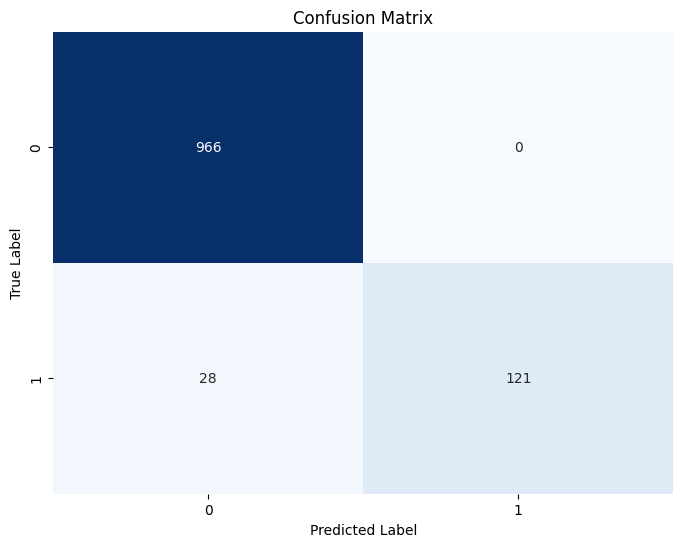

In [8]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

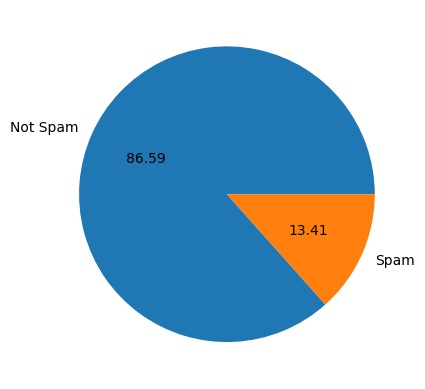

In [11]:

plt.pie(spam_data['Category'].value_counts(), labels=['Not Spam', 'Spam'], autopct="%0.2f")
plt.show()
